# Part02 데이터 탐색과 차원 축소

## Chacpter 03 데이터 시각화

- 데이터셋의 다차원성을 탐색하기 위한 시각화 기법들 알아보기
  - 기본 차트(막대그래프, 선그래프, 산점도)
  - 분포도(박스 플롯, 히스토그램)
  - 지도 학습(예측, 분류, 시계열 예측)
  - 인터랙티브 시각화 기법 vs 정적 차트
  - 특별한 데이터셋 분석(계층형, 네트워크형, 공간형 구조)

### 3.1 개요

- 복잡한 언어 정보를 간결하고 이해하기 쉬운 이미지로 압축하는 능력 필요
  - 숫자 : 데이터 시각화, 집계표
  - 시각화
    - 틀린 수치들, 결측치, 중복 행, 중복 열 등의 데이터 정제
    - 변수 도출 및 선택 (분석에 포함 및 제외할 변수 결정)
    - 구간 크기 적정한지, 수치형 변수들의 구간화 필요성 여부, 축소(합치기)

### 이 장에 필요한 파이썬 라이브러리 불러오기

In [141]:
pip install networkx

77156.08s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [142]:
pip install seaborn

77161.91s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [143]:
import os
import calendar
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

---

# 보스턴 주택 데이터의 처음 9개 레코드
## 보스턴 주택 파일을 열어 처음 9개 레코드 보여주기

In [144]:
housing_df = pd.read_csv('../1주차/dmba/BostonHousing.csv')

In [145]:
# rename CAT. MEDV column for easier data handling
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
housing_df.head(9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


---

# [그림 3-1]을 생성하는 파이썬 코드

In [146]:
## Load the Amtrak data and convert them to be suitable for time series analysis
Amtrak_df = pd.read_csv('../1주차/dmba/Amtrak.csv')
Amtrak_df['Data'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
ridership_ts = pd.Series(Amtrak_df.Ridership.values, index=Amtrak_df.Data)

In [147]:
## Boston housing data
housing_df = pd.read_csv('../1주차/dmba/BostonHousing.csv')
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})

## Pandas 버전

Text(0, 0.5, 'Ridership (in 000s)')

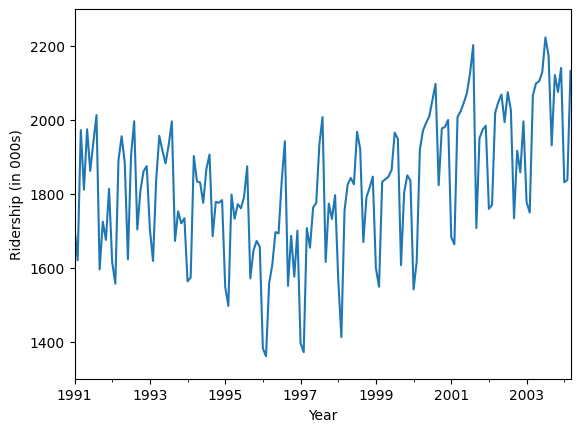

In [148]:
## line graph
ridership_ts.plot(ylim=[1300, 2300], legend=False)
plt.xlabel('Year') # set x-axis label
plt.ylabel('Ridership (in 000s)') # set y-axis label

<Axes: xlabel='LSTAT', ylabel='MEDV'>

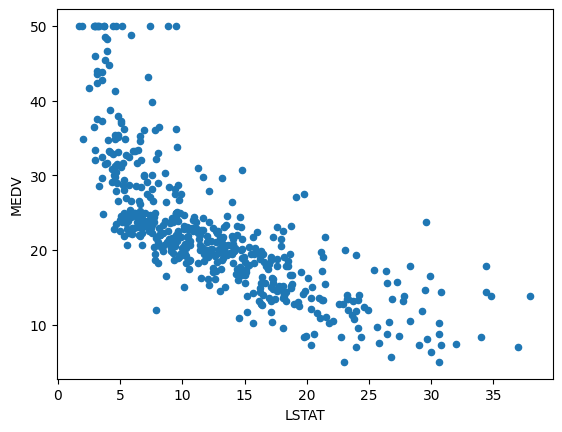

In [149]:
## scatter plot with axes names
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False)

Text(0, 0.5, 'Avg. MEDV')

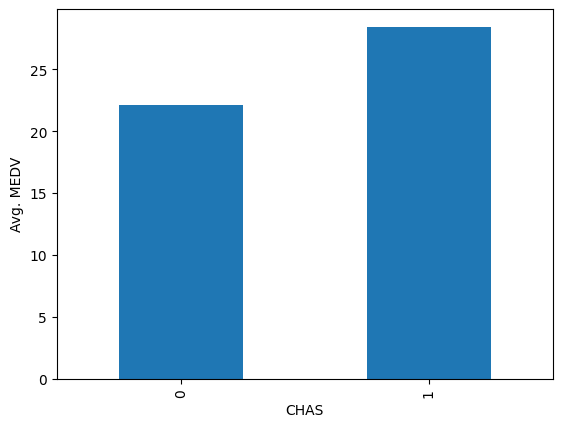

In [150]:
## barchart of CHAS vs.mean MEDV
# compute mean MEDV per CHAS = (0, 1)
ax = housing_df.groupby('CHAS').mean().MEDV.plot(kind='bar')
ax.set_ylabel('Avg. MEDV')

Text(0, 0.5, '% of CAT.MEDV')

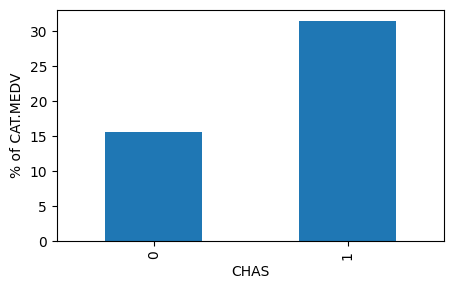

In [151]:
## barchart of CHAS vs. CAT_MEDV
dataForPlot = housing_df.groupby('CHAS').mean()['CAT_MEDV'] * 100
ax = dataForPlot.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('% of CAT.MEDV')

## 맷플롯립(matplotlib) 버전

Text(0, 0.5, 'Ridership (in 000s)')

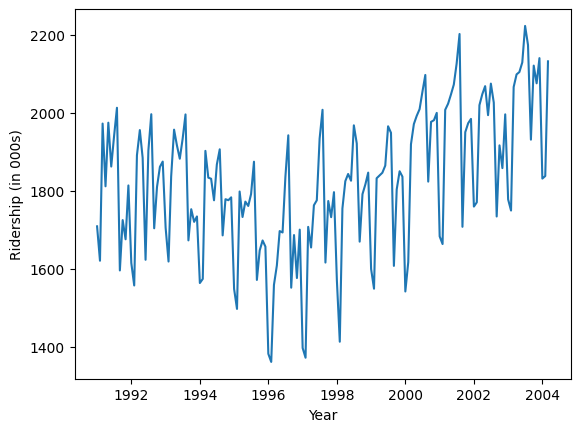

In [152]:
## line graph
plt.plot(ridership_ts.index, ridership_ts)
plt.xlabel('Year') # set x-axis label
plt.ylabel('Ridership (in 000s)') # set y-axis label

Text(0, 0.5, 'MEDV')

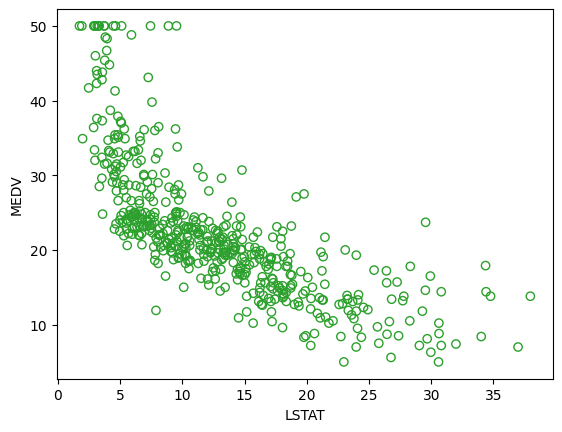

In [153]:
## Set the color of the points in the scatterplot and draw as open circles.
plt.scatter(housing_df.LSTAT, housing_df.MEDV, color='C2', facecolor='none')
plt.xlabel('LSTAT'); plt.ylabel('MEDV')

TypeError: 0 must be a sequence

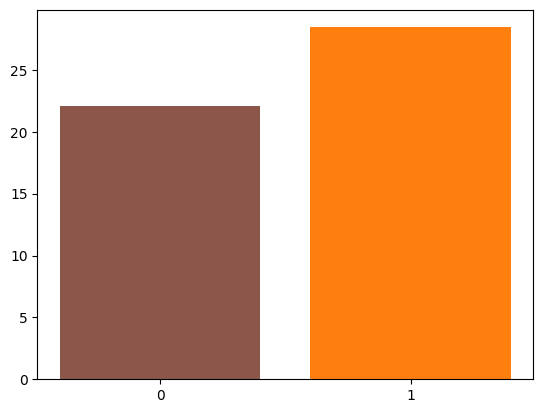

In [154]:
## barchart of CHAS vs. mean MEDV
# computer mean MEDV per CHAS = (0, 1)
dataForPlot = housing_df.groupby('CHAS').mean().MEDV
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticks([0, 1], False)
ax.set_xlabel('CHAS'); 
ax.set_ylabel('Avg. MEDV')

TypeError: 0 must be a sequence

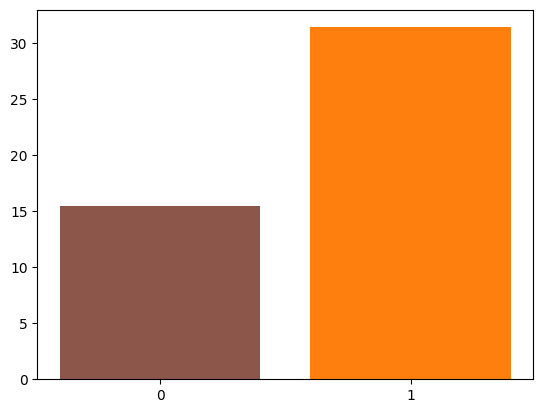

In [155]:
## barchart of CHAS vs. CAT.MEDV
dataForPlot = housing_df.groupby('CHAS').mean()['CAT_MEDV'] * 100
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticks([0, 1], False)
ax.set_xlabel('CHAS'); ax.set_ylabel('% of CAT.MEDV')

---

# [그림 3-2]을 생성하는 파이썬 코드

Text(0, 0.5, 'count')

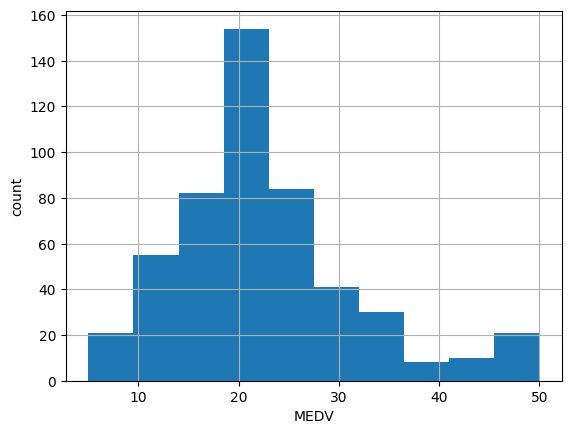

In [156]:
## histogram of MEDV
ax = housing_df.MEDV.hist()
ax.set_xlabel('MEDV'); ax.set_ylabel('count')

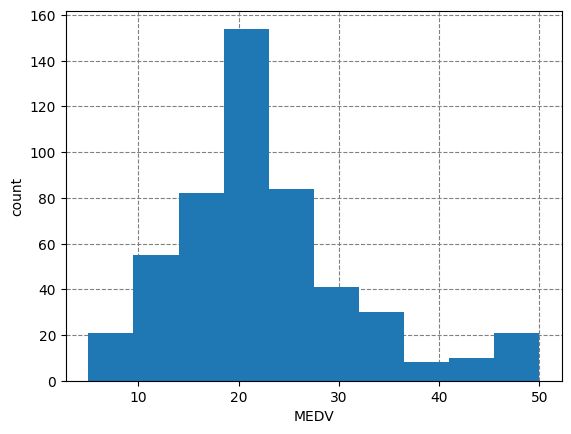

In [157]:
# alternative plot with matplotlib
fig, ax = plt.subplots()
ax.hist(housing_df.MEDV)
ax.set_axisbelow(True) # Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--')
ax.set_xlabel('MEDV'); ax.set_ylabel('count')
plt.show()

Text(0.5, 1.0, '')

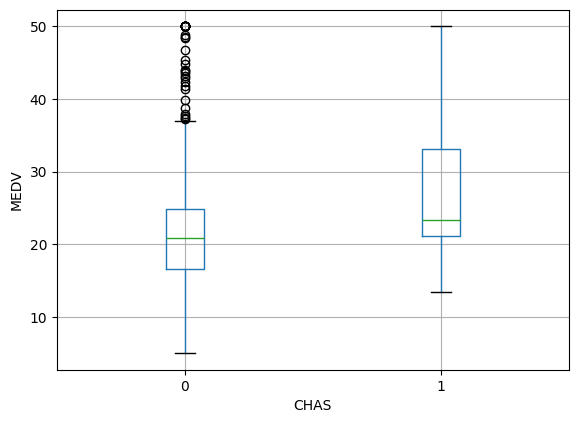

In [158]:
## boxplot of MEDV for different values of CHAS
ax = housing_df.boxplot(column='MEDV', by='CHAS')
ax.set_ylabel('MEDV')
plt.suptitle('') # Suppress the titles
plt.title('') 

TypeError: 0 must be a sequence

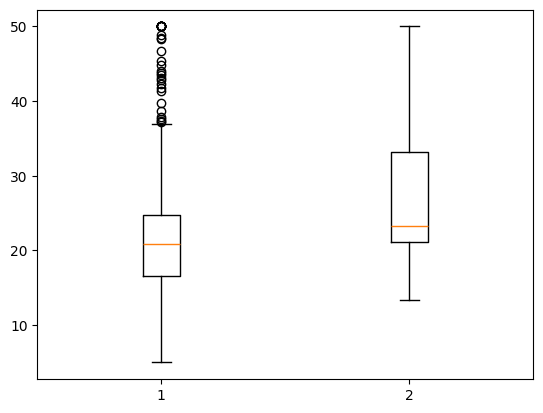

In [160]:
# alternative plot with matplotlib
dataForPlot = [list(housing_df[housing_df.CHAS == 0].MEDV),
               list(housing_df[housing_df.CHAS == 1].MEDV)]
fig, ax = plt.subplots()
ax.boxplot(dataForPlot)
ax.set_xticks([1, 2], False)
ax.set_xticklabels([0, 1])
ax.set_xlabel('CHAS'); ax.set_ylabel('MEDV')
plt.show()

---

# [그림 3-3]을 생성하는 파이썬 코드

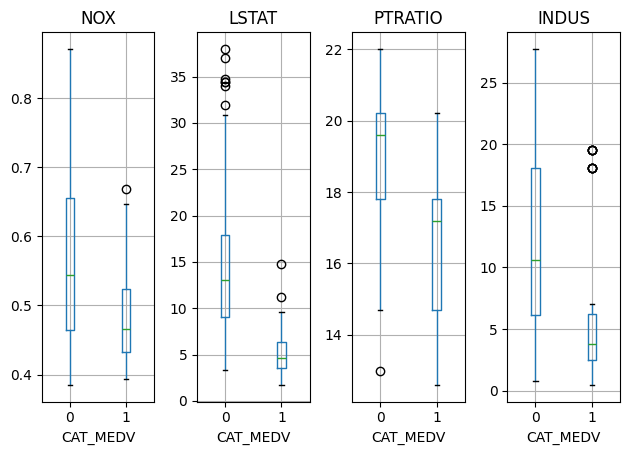

In [161]:
## side-by-side boxplots
fig, axes = plt.subplots(nrows=1, ncols=4)
housing_df.boxplot(column='NOX', by='CAT_MEDV', ax=axes[0])
housing_df.boxplot(column='LSTAT', by='CAT_MEDV', ax=axes[1])
housing_df.boxplot(column='PTRATIO', by='CAT_MEDV', ax=axes[2])
housing_df.boxplot(column='INDUS', by='CAT_MEDV', ax=axes[3])
for ax in axes:
    ax.set_xlabel('CAT_MEDV')
plt.suptitle('') # Suppress the titles
plt.tight_layout() # Increase the separation between the plots

---

# [그림 3-4]을 생성하는 파이썬 코드

<Axes: >

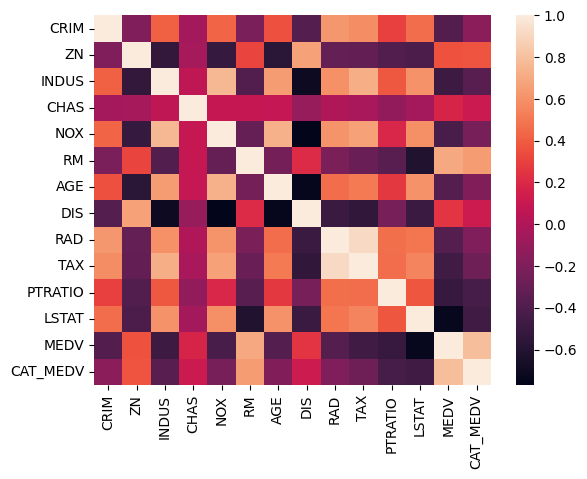

In [162]:
## simple heatmap of correlations (without values)
corr = housing_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

<Axes: >

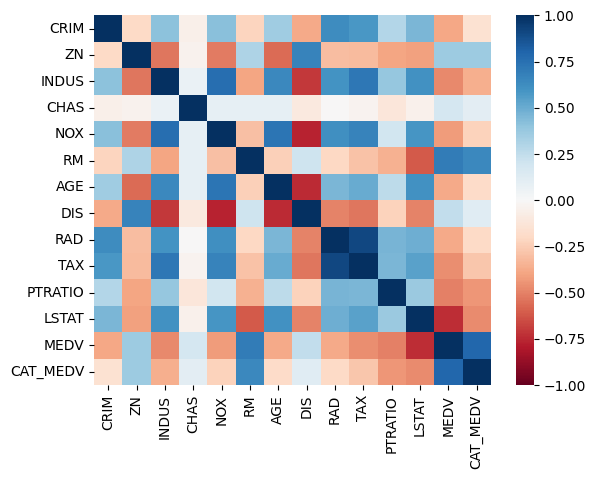

In [163]:
# Change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1,
            cmap="RdBu")

<Axes: >

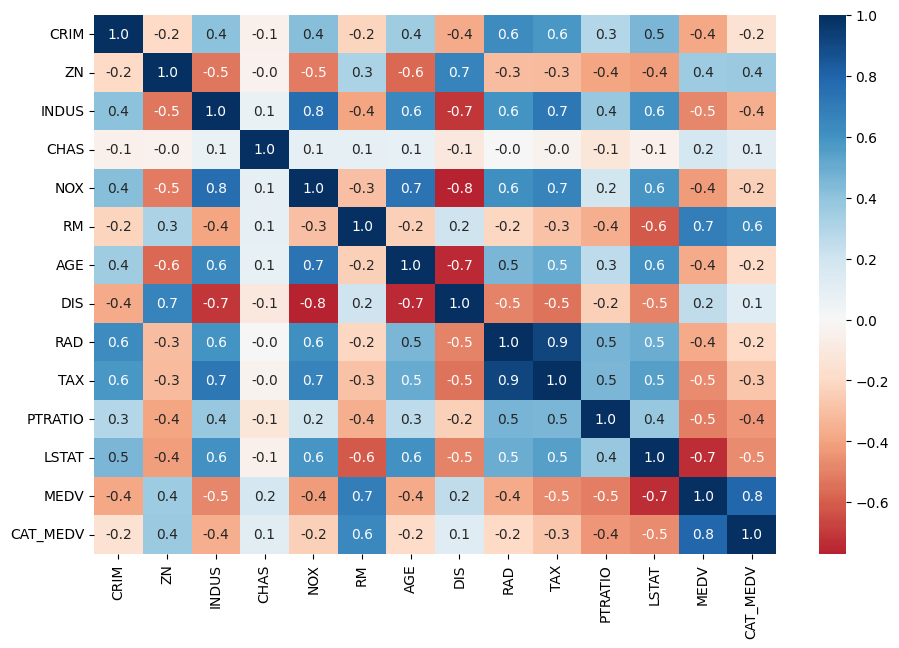

In [164]:
# Include information about values (example demonstate how to control the size of
# the plot)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

---

## [그림 3-5]와 같은 결측치 히트맵을 생성하는 파이썬 코드

In [165]:
df = pd.read_csv('../1주차/dmba/NYPD_Motor_Vehicle_Collisions_1000.csv').sort_values(['DATE'])

In [166]:
# given a dataframe df create a copy of the array that is 0 if a field contains a 
# value and 1 for NaN
naInfo = np.zeros(df.shape)
naInfo[df.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns=df.columns)

[]

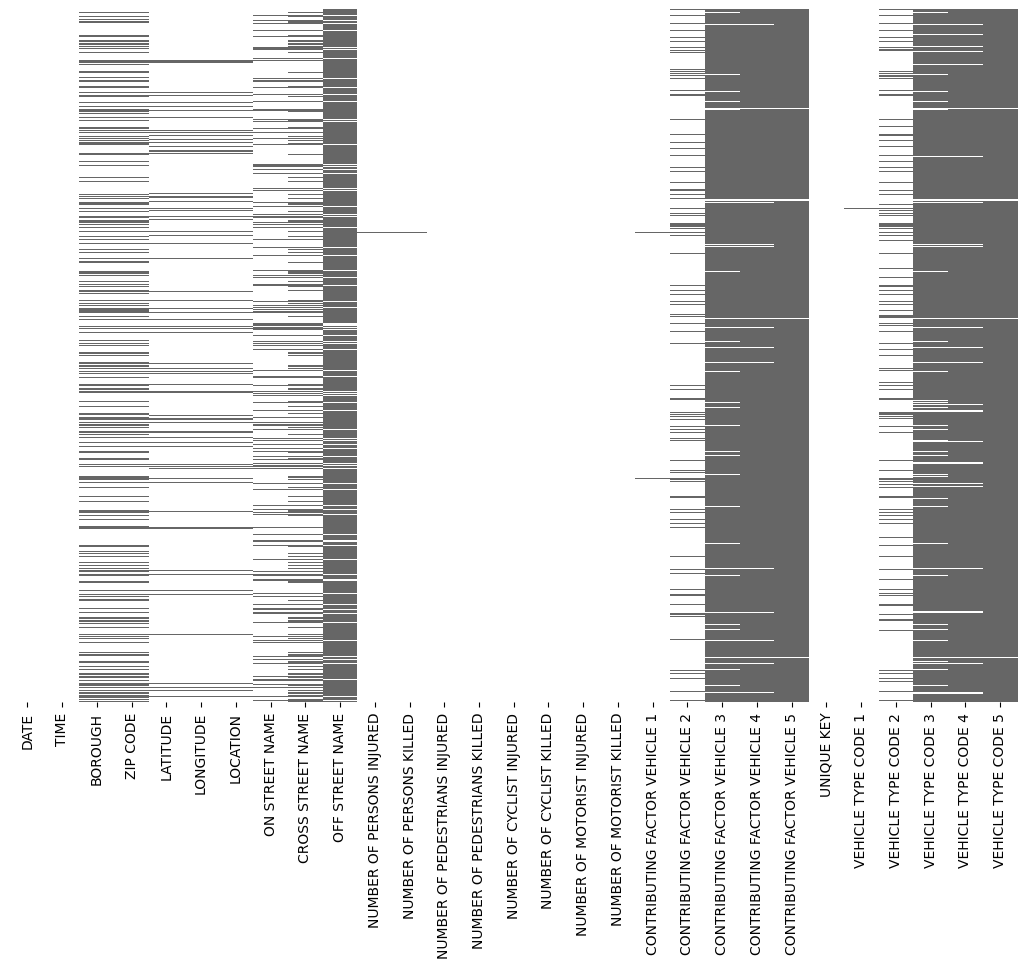

In [167]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "#666666"], cbar=False, ax=ax)
ax.set_yticks([])

In [168]:
# draw frame around figure
rect = plt.Rectangle((0, 0), naInfo.shape[1], naInfo.shape[0], linewidth=1,
                     edgecolor='lightgrey', facecolor='none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

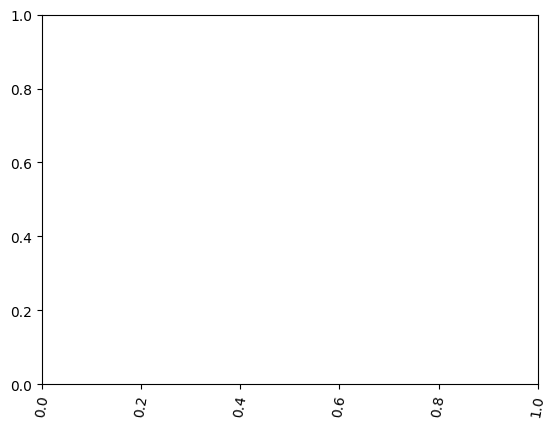

In [169]:
plt.xticks(rotation=80)

---

## [그림 3-6]을 생성하는 파이썬 코드

<Axes: xlabel='LSTAT', ylabel='NOX'>

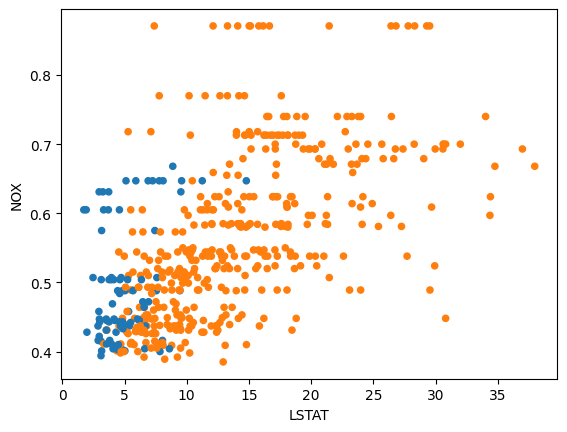

In [170]:
# Color the points by the value of CAT.MEDV
housing_df.plot.scatter(x='LSTAT', y='NOX', c=['C0' if c == 1 else 'C1' for c in housing_df.CAT_MEDV])

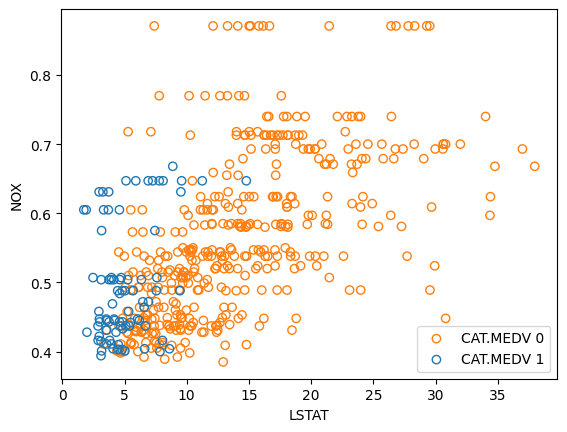

In [171]:
# Plot first the data points for CAT.MEDV of 0 and then of 1
# Setting color to 'none' gives open circles
_, ax = plt.subplots()
for catValue, color in (0, 'C1'), (1, 'C0'):
    subset_df = housing_df[housing_df.CAT_MEDV == catValue]
    ax.scatter(subset_df.LSTAT, subset_df.NOX, color='none', edgecolor=color)
ax.set_xlabel('LSTAT')
ax.set_ylabel('NOX')
ax.legend(["CAT.MEDV 0", "CAT.MEDV 1"])
plt.show()

In [172]:
## panel plots
# comppute mean MEDV per RAD and CHAS
dataForPlot_df = housing_df.groupby(['CHAS','RAD']).mean()['MEDV']
# We determine all possible RAD values to use as ticks
ticks = set(housing_df.RAD)
for i in range(2):
    for t in ticks.difference(dataForPlot_df[i].index):
        dataForPlot_df.loc[(i, t)] = 0
# reorder to rows, so that the index is sorted
dataForPlot_df = dataForPlot_df[sorted(dataForPlot_df.index)]

In [173]:
# Determine a common range for the y axis
yRange = [0, max(dataForPlot_df) * 1.1]

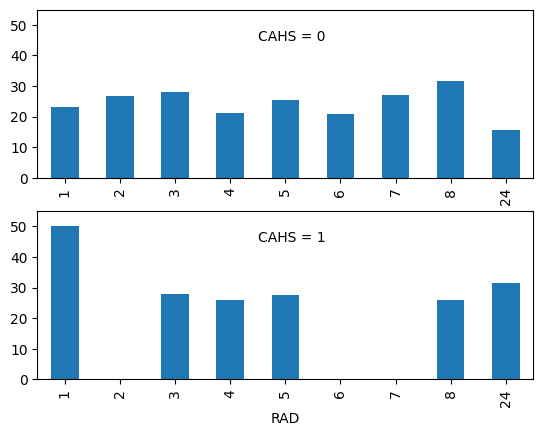

In [174]:
fig, axes = plt.subplots(nrows=2, ncols=1)
dataForPlot_df[0].plot.bar(x='RAD', ax=axes[0], ylim=yRange)
dataForPlot_df[1].plot.bar(x='RAD', ax=axes[1], ylim=yRange)
axes[0].annotate('CAHS = 0', xy=(3.5, 45))
axes[1].annotate('CAHS = 1', xy=(3.5, 45))
plt.show()

---

# [그림 3-7]을 생성하는 파이썬 코드

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

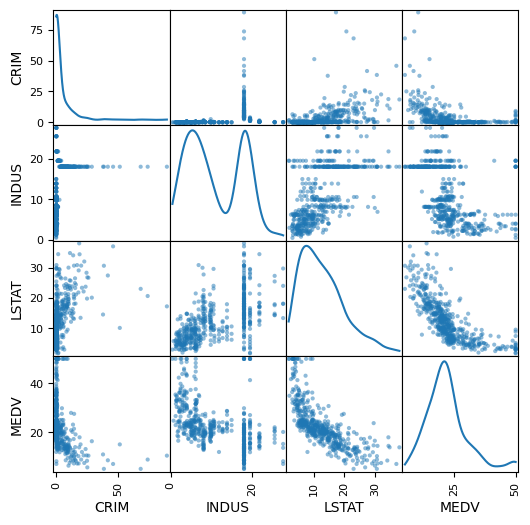

In [178]:
# Display scatterpots between the different variables
# The diagonal shows the distribution for each variable
df = housing_df[['CRIM', 'INDUS', 'LSTAT', 'MEDV']]
axes = scatter_matrix(df, alpha=0.5, figsize=(6, 6), diagonal='kde')
corr = df.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate('%.3f' %corr[i,j], (0.8, 0.8), xycoords='axes fraction',
                        ha='center', va='center')

---

# [그림 3-8]을 생성하는 파이썬 코드

In [179]:
# Avoid the use of scientific notation for the log axis
plt.rcParams['axes.formatter.min_exponent'] = 4

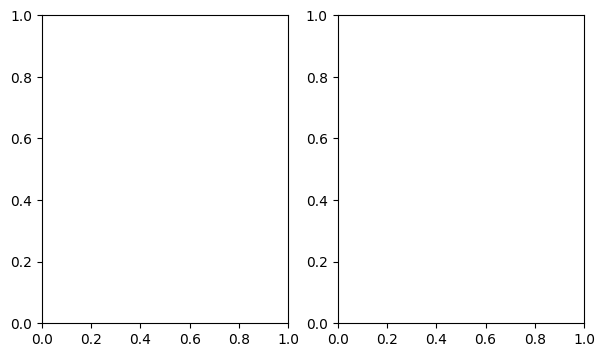

In [181]:
## scatter plot: regular and log scale
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))

In [182]:
# regular scale
housing_df.plot.scatter(x='CRIM', y='MEDV', ax=axes[0])
# log scale
ax = housing_df.plot.scatter(x='CRIM', y='MEDV', logx=True, logy=True, ax=axes[1])
ax.set_yticks([5, 10, 20, 50])
ax.set_yticklabels([5, 10, 20, 50])
plt.tight_layout(); plt.show()

<Figure size 640x480 with 0 Axes>

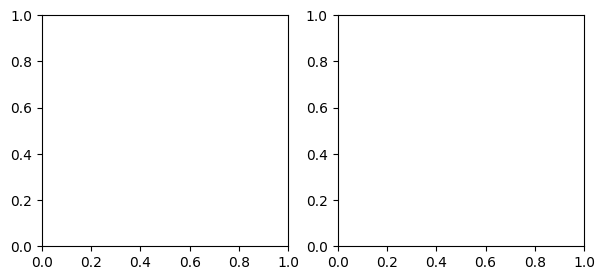

In [183]:
## boxplot: regular and log scale
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

In [184]:
# regular scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[0])
ax.set_xlabel('CAT.MEDV'); ax.set_ylabel('CRIM')
# log scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[1])
ax.set_xlabel('CAT.MEDV'); ax.set_ylabel('CRIM'); ax.set_yscale('log')
# suppress the title
axes[0].get_figure().suptitle(''); plt.tight_layout(); plt.show()


<Figure size 640x480 with 0 Axes>

---

# [그림 3-9]을 생성하는 파이썬 코드

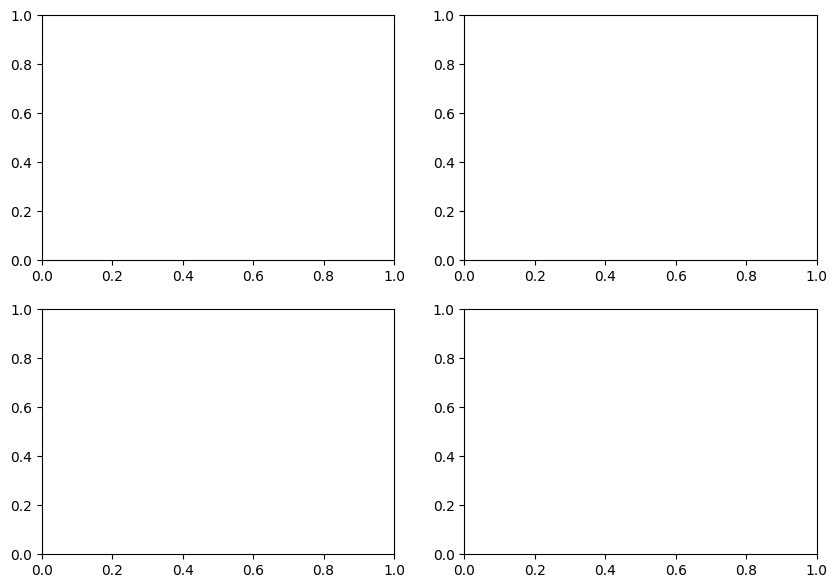

In [185]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

In [186]:
Amtrak_df = pd.read_csv('../1주차/dmba/Amtrak.csv')
Amtrak_df['Month'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
Amtrak_df.set_index('Month', inplace=True)

In [187]:
# fit quadratic curve and disply
quadraticFit = np.poly1d(np.polyfit(range(len(Amtrak_df)), Amtrak_df.Ridership, 2))
Amtrak_fit = pd.DataFrame({'fit': [quadraticFit(t) for t in range(len(Amtrak_df))]})
Amtrak_fit.index = Amtrak_fit.index

In [188]:
ax = Amtrak_df.plot(ylim=[1300, 2300], legend=False, ax=axes[0][0])
Amtrak_fit.plot(ax=ax)
ax.set_xlabel('Year'); ax.set_ylabel('Ridership (in 000s)') # set x and y-axis label

TypeError: index type not supported

In [189]:
# Zoom in 2-year period 1/1/1991 to 12/1/1992
ridership_2yrs = Amtrak_df.loc['1991-01-01': '1992-12-01']
ax = ridership_2yrs.plot(ylim=[1300, 2300], legend=False, ax=axes[1][0])
ax.set_xlabel('Year'); ax.set_ylabel('Ridership (in 000s)') # set x and y-axis label

Text(4.444444444444452, 0.5, 'Ridership (in 000s)')

In [190]:
# Average by month
byMonth = Amtrak_df.groupby(by=[Amtrak_df.index.month]).mean()
ax = byMonth.plot(ylim=[1300, 2300], legend=False, ax=axes[0][1])
ax.set_xlabel('Month'); ax.set_ylabel('Ridership (in 000s)') # set x and y-axis label
yticks = [-2.0,-1.75,-1.5,-1.25, -1.0,-0.75,-0.5,-0.25,-0.0]
ax.set_xticks(range(1, 13))
ax.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)]);

In [191]:
# Average by year (exclude data from 2004)
byYear = Amtrak_df.loc['1991-01-01':'2003-12-01'].groupby(pd.Grouper(freq='A')).mean()
ax = byYear.plot(ylim=[1300, 2300], legend=False, ax=axes[1][1])
ax.set_xlabel('Year'); ax.set_ylabel('Ridership (in 000s)') # set x and y-axis label

/var/folders/73/t8snjhy97rx10w3m4zbgvlkh0000gn/T/ipykernel_28860/4156406224.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  byYear = Amtrak_df.loc['1991-01-01':'2003-12-01'].groupby(pd.Grouper(freq='A')).mean()


Text(427.1717171717171, 0.5, 'Ridership (in 000s)')

In [192]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

---

# [그림 3-10]을 생성하는 파이썬 코드

In [193]:
utilities_df = pd.read_csv('../1주차/dmba/Utilities.csv')

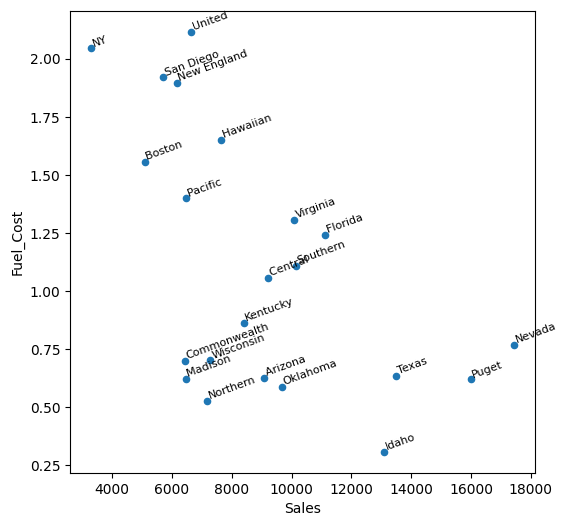

In [194]:
ax = utilities_df.plot.scatter(x='Sales', y='Fuel_Cost', figsize=(6,6))
points = utilities_df[['Sales', 'Fuel_Cost','Company']]
_ = points.apply(lambda x:
             ax.text(*x, rotation=20, horizontalalignment='left',
                     verticalalignment='bottom', fontsize=8), axis=1)

---

# [그림 3-11]을 생성하는 파이썬 코드

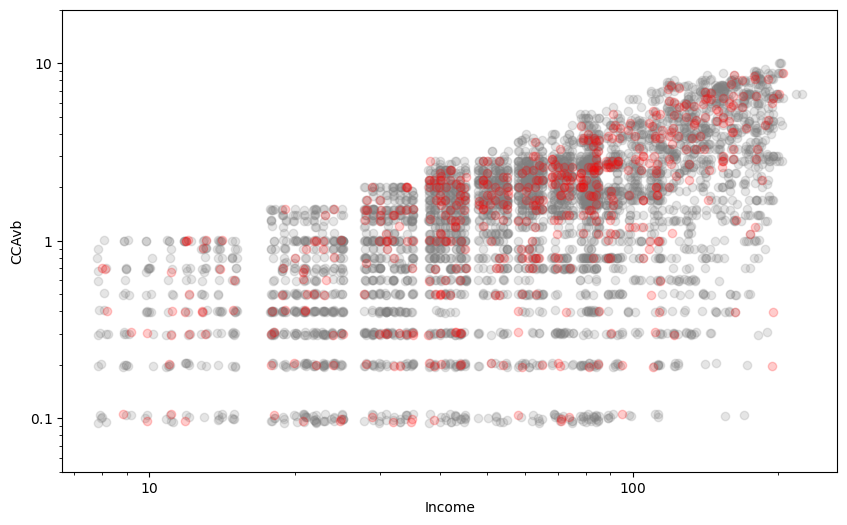

In [195]:
def jitter(x, factor=1):
    """ Add random jitter to x values """
    sx = np.array(sorted(x))
    delta = sx[1:] - sx[:-1]
    minDelta = min(d for d in delta if d > 0)
    a = factor * minDelta / 5
    return x + np.random.uniform(-a, a, len(x))
universal_df = pd.read_csv('../1주차/dmba/UniversalBank.csv')

saIdx = universal_df[universal_df['Securities Account'] == 1].index

plt.figure(figsize=(10,6))
plt.scatter(jitter(universal_df.drop(saIdx).Income),
            jitter(universal_df.drop(saIdx).CCAvg), marker='o', color='grey', alpha=0.2)
plt.scatter(jitter(universal_df.loc[saIdx].Income),
            jitter(universal_df.loc[saIdx].CCAvg), marker='o', color='red', alpha=0.2)
plt.xlabel('Income')
plt.ylabel('CCAvb')
plt.ylim((0.05, 20))
axes = plt.gca()
axes.set_xscale("log")
axes.set_yscale("log")
plt.show()

---

# [그림 3-12]를 생성하는 파이썬 코드

In [196]:
# Transform the axes, so that they all have the same range
min_max_scaler = preprocessing.MinMaxScaler()
dataToPlot = pd.DataFrame(min_max_scaler.fit_transform(housing_df), columns=housing_df.columns)

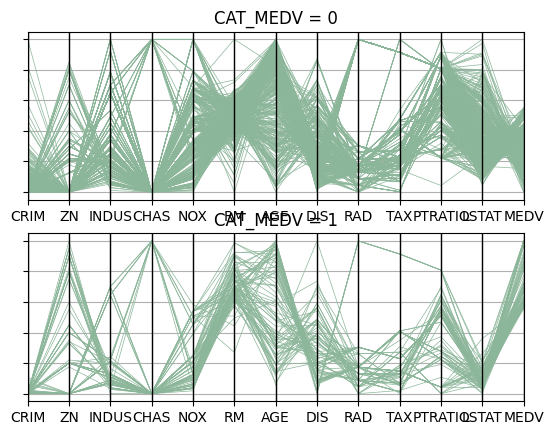

In [197]:
fig, axes = plt.subplots(nrows=2, ncols=1)
for i in (0, 1):
    parallel_coordinates(dataToPlot.loc[dataToPlot.CAT_MEDV == i], 'CAT_MEDV', ax=axes[i], linewidth=0.5)
    axes[i].set_title('CAT_MEDV = {}'.format(i))
    axes[i].set_yticklabels([])
    axes[i].legend().set_visible(False)

In [198]:
plt.tight_layout # Increase the separation between the plots

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

---

# [그림 3-14]을 생성하는 파이썬 코드

In [199]:
ebay_df = pd.read_csv('../1주차/dmba/eBayNetwork.csv')

In [200]:
G = nx.from_pandas_edgelist(ebay_df, source='Seller', target='Bidder')

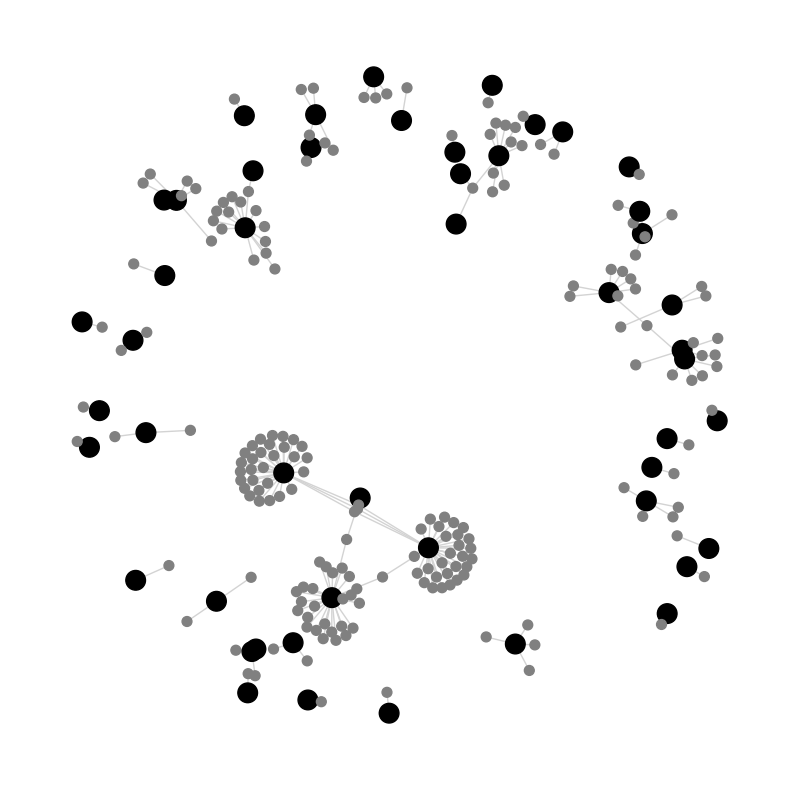

In [201]:
isBidder = [n in set(ebay_df.Bidder) for n in G.nodes()]
pos = nx.spring_layout(G, k=0.13, iterations=60, scale=0.5)
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 edge_color='lightgray',
                 node_color=['gray' if bidder else 'black' for bidder in isBidder],
                 node_size=[50 if bidder else 200 for bidder in isBidder])
plt.axis('off')
plt.show()

---

# [그림 3-16]을 생성하는 파이썬 코드

In [202]:
pip install squarify

77362.22s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [204]:
import squarify

In [205]:
ebayTreemap = pd.read_csv('../1주차/dmba/EbayTreemap.csv')

In [206]:
grouped = []
for category, df in ebayTreemap.groupby(['Category']):
    negativeFeedback = sum(df['Seller Feedback'] < 0) / len(df)
    grouped.append({
        'category': category,
        'negativeFeedback': negativeFeedback,
        'averageBid': df['High Bid'].mean()
    })
byCategory = pd.DataFrame(grouped)

In [207]:
norm = matplotlib.colors.Normalize(vmin=byCategory.negativeFeedback.min(), vmax=byCategory.negativeFeedback.max())

NameError: name 'matplotlib' is not defined

In [208]:
colors = [matplotlib.cm.Blues(norm(value)) for value in byCategory.negativeFeedback]

NameError: name 'matplotlib' is not defined

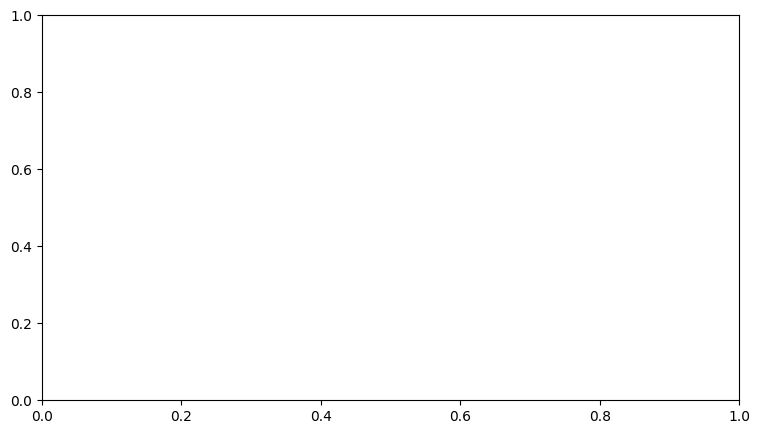

In [209]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)

In [210]:
squarify.plot(label=byCategory.category, sizes=byCategory.averageBid, color=colors,
              ax=ax, alpha=0.6, edgecolor='grey')

NameError: name 'colors' is not defined

In [211]:
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

[]

In [212]:
plt.subplots_adjust(left=0.1)
plt.show()

<Figure size 640x480 with 0 Axes>

---

# [그림 3-17]을 생성하는 파이썬 코드

In [214]:
pip install gmaps

77575.94s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076084 sha256=73eef45406fa47adb70ec79ab3fc2dcba8462c49620bf85b40f1ee052f4c273e
  Stored in directory: /Users/green_jeong/Library/Caches/pip/wheels/a5/51/a3/445b6eb00f7ad446fb1fd1b0702534d6289fce4b5d95ee5457
Successfully built gmaps
Note: you may need to restart the kernel to use updated packages.


In [215]:
import gmaps
SCstudents = pd.read_csv('../1주차/dmba/SC-US-students-GPS-data-2016.csv')

In [218]:
gmaps.configure(api_key=os.environ['GMAPS_API_KEY'])
fig = gmaps.figure(center=(39.7, -105), zoom_level=3)
fig.add_layer(gmaps.symbol_layer(SCstudents, scale=2,fill_color='red', stroke color='red'))
fig

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2092735958.py, line 3)

---

# [그림 3-18]을 생성하는 파이썬 코드

In [1]:
pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 32.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 28.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
# import pandas as pd

In [6]:
gdp_df = pd.read_csv('../1주차/dmba/gdp.csv', skiprows=4)
gdp_df.rename(columns={'2015': 'GDP2015'}, inplace=True)
gdp_df.set_index('Country Code', inplace=True) # use three letter country code to access rows

In [7]:
# The file contains a column with two letter combinations, use na_filter to avoid
# converting the combination NA into not-a-number
happiness_df = pd.read_csv('../1주차/dmba/Veerhoven.csv', na_filter = False)
happiness_df.set_index('Code', inplace=True) # use the country name to access rows

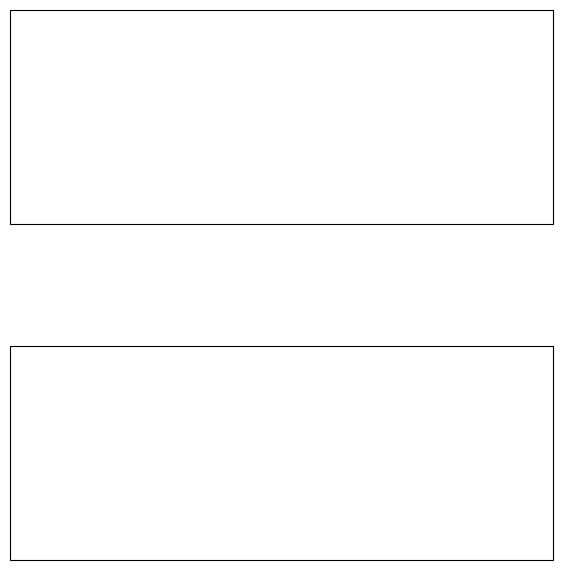

In [8]:
fig = plt.figure(figsize=(7, 8))
ax1 = plt.subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax1.set_extent([-150, 60, -25, 60])
ax2 = plt.subplot(2, 1, 2, projection=ccrs.PlateCarree())
ax2.set_extent([-150, 60, -25, 60])

In [11]:
# Create a color mapper
cmap = plt.cm.Blues_r
norm1 = matplotlib.colors.Normalize(vmin=happiness_df.Score.dropna().min(),
                                    vmax=happiness_df.Score.dropna().min())
norm2 = matplotlib.colors.LogNorm(vmin=gdp_df.GDP2015.dropna().min(), vmax=gdp_df.GDP2015.dropna().max())

In [ ]:
shpfilename = shpreader.natural_earth